## Importing necessary libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score

## Reading the data

#Data can be downloaded from:
#https://www.kaggle.com/ishandutta/early-stage-diabetes-risk-prediction-dataset

In [67]:
diab=pd.read_csv('D:/R programs/diabetes_data_upload.csv')
diab.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Exploratory Data Analysis

In [68]:
diab['Age'].describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

In [69]:
diab.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [70]:
diab['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

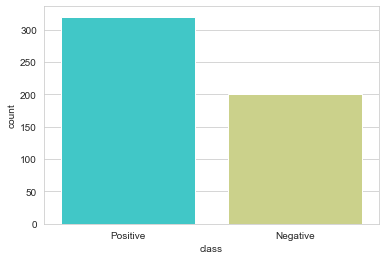

In [71]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=diab,palette='rainbow')

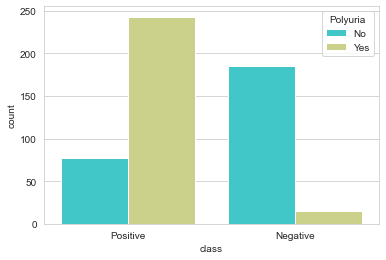

In [72]:
sns.set_style('whitegrid')
sns.countplot(x='class',hue='Polyuria',data=diab,palette='rainbow')

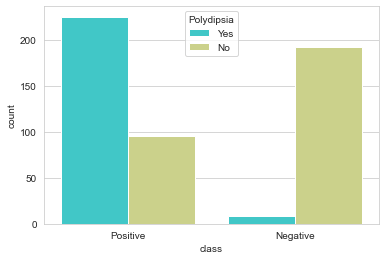

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='class',hue='Polydipsia',data=diab,palette='rainbow')

In [74]:
diab.corr()

,Age
Age,1.0


In [75]:
def age(df):
    if df<=25:
        return 'Young'
    elif df>25 and df<60:
        return'Middle'
    else:
        return 'Old'

In [76]:
diab['Age']=diab['Age'].apply(age)

In [77]:
diab.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,Middle,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,Middle,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,Middle,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,Middle,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,Old,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Creating dummy variables for categorical features

In [78]:
diab.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [79]:
diab=pd.get_dummies(diab,columns=['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'])

In [80]:
diab.head()

,class,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,...,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
0,Positive,1,0,0,0,1,1,0,0,1,...,0,1,1,0,0,1,0,1,0,1
1,Positive,1,0,0,0,1,1,0,1,0,...,1,0,0,1,1,0,0,1,1,0
2,Positive,1,0,0,0,1,0,1,1,0,...,0,1,1,0,0,1,0,1,1,0
3,Positive,1,0,0,0,1,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
4,Positive,0,1,0,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1


# Label encoding the target variable

In [81]:
label=preprocessing.LabelEncoder()
diab['class']=label.fit_transform(diab['class'])
diab.head()

,class,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,...,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
0,1,1,0,0,0,1,1,0,0,1,...,0,1,1,0,0,1,0,1,0,1
1,1,1,0,0,0,1,1,0,1,0,...,1,0,0,1,1,0,0,1,1,0
2,1,1,0,0,0,1,0,1,1,0,...,0,1,1,0,0,1,0,1,1,0
3,1,1,0,0,0,1,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
4,1,0,1,0,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1


## Building models

In [82]:
x,y=diab.drop(['class'],axis=1),diab['class']

## Train-Test Split

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Defining models

In [84]:
log=LogisticRegression()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
bag=BaggingClassifier()
xtra=ExtraTreesClassifier()
gb=GradientBoostingClassifier()

## Fitting the models

In [85]:
log.fit(x_train,y_train)
rf.fit(x_train,y_train)
ada.fit(x_train,y_train)
bag.fit(x_train,y_train)
xtra.fit(x_train,y_train)
gb.fit(x_train,y_train)

GradientBoostingClassifier()

## Making predictions

In [86]:
log_pred=log.predict(x_test)
rf_pred=rf.predict(x_test)
ada_pred=ada.predict(x_test)
bag_pred=bag.predict(x_test)
xtra_pred=xtra.predict(x_test)
gb_pred=gb.predict(x_test)

## Evaluation of models

In [87]:
print('Accuracy of Logistic regression model is {:.2f}'.format(accuracy_score(y_test,log_pred)))
print('Accuracy of Random forest model is {:.2f}'.format(accuracy_score(y_test,rf_pred)))
print('Accuracy of Adaboost model is {:.2f}'.format(accuracy_score(y_test,ada_pred)))
print('Accuracy of Bagging model is {:.2f}'.format(accuracy_score(y_test,bag_pred)))
print('Accuracy of Extra trees model is {:.2f}'.format(accuracy_score(y_test,xtra_pred)))
print('Accuracy of Gradient boosting model is {:.2f}'.format(accuracy_score(y_test,gb_pred)))

Accuracy of Logistic regression model is 0.92
Accuracy of Random forest model is 0.97
Accuracy of Adaboost model is 0.92
Accuracy of Bagging model is 0.92
Accuracy of Extra trees model is 0.97
Accuracy of Gradient boosting model is 0.96


In [88]:
print('Precision of Logistic regression model is {:.2f}'.format(precision_score(y_test,log_pred)))
print('Precision of Random forest model is {:.2f}'.format(precision_score(y_test,rf_pred)))
print('Precision of Adaboost model is {:.2f}'.format(precision_score(y_test,ada_pred)))
print('Precision of Bagging model is {:.2f}'.format(precision_score(y_test,bag_pred)))
print('Precision of Extra trees model is {:.2f}'.format(precision_score(y_test,xtra_pred)))
print('Precision of Gradient boosting model is {:.2f}'.format(precision_score(y_test,gb_pred)))

Precision of Logistic regression model is 0.97
Precision of Random forest model is 0.98
Precision of Adaboost model is 0.97
Precision of Bagging model is 0.99
Precision of Extra trees model is 0.98
Precision of Gradient boosting model is 0.99


## Extracting important features

In [89]:
imp=pd.DataFrame({'Feature':list(x_train.columns),'Importance':rf.feature_importances_}).sort_values('Importance',ascending=False)
imp

,Feature,Importance
5,Polyuria_No,0.136242
6,Polyuria_Yes,0.120992
7,Polydipsia_No,0.112176
8,Polydipsia_Yes,0.093990
4,Gender_Male,0.049821
3,Gender_Female,0.041237
10,sudden weight loss_Yes,0.031969
9,sudden weight loss_No,0.031897
21,Irritability_No,0.026296
22,Irritability_Yes,0.025259


## Conclusion: Polyuria and Polydipsia are the significant features